Perform the pre-requisite viz. :
Assessing the Data

i. Data cleaning
ii. Inspection
iii. Manipulation if required
iv. Extracting meaningful visualization based on your understanding
v. Data consolidation if required

Q1. Find out the alternative sources of fuel available in 2008 & 2018 respectively and by how much?
Q2. Is there any improvement in ‘fuel economy’ with respect to vehicle class from 2008 to 2018,
perform the necessary steps to examine?
Q3. Is there any change in characteristics of SmartWay Vehicles ?
Q4. Which all features are associated with better fuel economy?
Q5. How much improvement is there in miles/gallon or mpg? Also, which vehicle has improved the
most?

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [250]:
alpha8 = pd.read_csv('all_alpha_08.csv')
alpha8.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [251]:
alpha18 = pd.read_csv('all_alpha_18.csv')
alpha18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [252]:
alpha8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [253]:
alpha8.isna().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [254]:
alpha8['Cyl']

0       (6 cyl)
1       (6 cyl)
2       (4 cyl)
3       (4 cyl)
4       (6 cyl)
         ...   
2399    (6 cyl)
2400    (8 cyl)
2401    (6 cyl)
2402    (6 cyl)
2403    (8 cyl)
Name: Cyl, Length: 2404, dtype: object

In [255]:
alpha8['Cyl'] = alpha8['Cyl'].str.strip('cyl()')
alpha8['Cyl'] = alpha8['Cyl']
alpha8['Cyl'].ffill(inplace=True)

In [256]:
alpha8['Cyl'] = alpha8['Cyl'].astype(int)
alpha8

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,CA,U2,8VVXB03.2U2N,SUV,7,Drv,14,20,16,20.7134,4,no
2400,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,CA,U2,8VVXB04.4U2N,SUV,7,Drv,13,19,15,19.4789,3,no
2401,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,FA,B5,8VVXB03.2U2N,SUV,6,Drv,14,20,16,20.9644,4,no
2402,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,FA,B5,8VVXB03.2U2N,SUV,6,Drv,14,20,16,20.7134,4,no


In [257]:
alpha8['Trans'].ffill(inplace=True)

In [258]:
alpha8['Drive'] = alpha8['Drive'].str.strip('WD')
alpha8['Drive'] = alpha8['Drive'].ffill()
alpha8['Drive'] = alpha8['Drive'].astype(int)


In [259]:
def repl(x):
    if len(str(x)) <= 2:
        pass
    elif x == np.nan:
        x = '0'
    else:
        x="0.72"
    return x

In [260]:
alpha8['City MPG']=alpha8['City MPG'].apply(repl)	
alpha8['Hwy MPG']=alpha8['Hwy MPG'].apply(repl)
alpha8['Cmb MPG']=alpha8['Cmb MPG'].apply(repl)	
alpha8['Greenhouse Gas Score']=alpha8['Greenhouse Gas Score'].apply(repl)

In [261]:
alpha8['City MPG']=alpha8['City MPG'].astype(float)	
alpha8['Hwy MPG']=alpha8['Hwy MPG'].astype(float)
alpha8['Cmb MPG']=alpha8['Cmb MPG'].astype(float)		
alpha8['Greenhouse Gas Score']=alpha8['Greenhouse Gas Score'].astype(float)

In [262]:
alpha8['Unadj Cmb MPG'].fillna(alpha8['Unadj Cmb MPG'].mean(),inplace=True)

In [263]:
alpha8['FE Calc Appr'].ffill(inplace=True)

In [264]:
alpha8.isna().sum() 

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Sales Area              0
Stnd                    0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
FE Calc Appr            0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Unadj Cmb MPG           0
Greenhouse Gas Score    0
SmartWay                0
dtype: int64

In [265]:
alpha8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2404 non-null   int64  
 3   Trans                 2404 non-null   object 
 4   Drive                 2404 non-null   int64  
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2404 non-null   object 
 12  City MPG              2404 non-null   float64
 13  Hwy MPG               2404 non-null   float64
 14  Cmb MPG               2404 non-null   float64
 15  Unadj Cmb MPG        

In [266]:
alpha8['SmartWay'].replace({'no':0, 'yes':1},inplace=True)

In [267]:
alpha8.head(8)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15.0,20.0,17.0,22.0527,4.0,0
1,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15.0,20.0,17.0,22.0527,4.0,0
2,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17.0,22.0,19.0,24.1745,5.0,0
3,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17.0,22.0,19.0,24.1745,5.0,0
4,ACURA RL,3.5,6,Auto-S5,4,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16.0,24.0,19.0,24.5629,5.0,0
5,ACURA RL,3.5,6,Auto-S5,4,Gasoline,FA,B5,8HNXV03.5HKR,midsize car,6,Drv,16.0,24.0,19.0,24.5629,5.0,0
6,ACURA TL,3.2,6,Auto-S5,2,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,18.0,26.0,21.0,27.2768,6.0,1
7,ACURA TL,3.5,6,Auto-S5,2,Gasoline,CA,U2,8HNXV03.5RKR,midsize car,7,Drv,17.0,26.0,20.0,25.9414,6.0,1


### Cleaning second data

In [268]:
alpha18.isna().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [269]:
alpha18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [270]:
alpha18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [271]:
alpha18['City MPG']=alpha18['City MPG'].apply(repl)	
alpha18['Hwy MPG']=alpha18['Hwy MPG'].apply(repl)
alpha18['Comb CO2']=alpha18['Comb CO2'].apply(repl)
alpha18['Cmb MPG']=alpha18['Cmb MPG'].apply(repl)	
#alpha8['Greenhouse Gas Score']=alpha8['Greenhouse Gas Score'].apply(repl)

In [272]:
alpha18['City MPG']=alpha18['City MPG'].astype(float)	
alpha18['Hwy MPG']=alpha18['Hwy MPG'].astype(float)
alpha18['Cmb MPG']=alpha18['Cmb MPG'].astype(float)		
alpha18['Comb CO2']=alpha18['Comb CO2'].astype(float)	
#alpha8['Greenhouse Gas Score']=alpha8['Greenhouse Gas Score'].astype(float)

In [273]:
alpha18['SmartWay'].replace({'No':0,'Yes':1,'Elite':2},inplace=True)

Cleaning Done

In [274]:
alpha8 = pd.read_csv('clean_08.csv')
alpha18 = pd.read_csv('clean_18.csv')

In [275]:
alpha8.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [276]:
alpha18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


Find out the alternative sources of fuel available in 2008 & 2018 respectively and by how much?

In [277]:
alpha8['fuel'].value_counts()

fuel
Gasoline    984
CNG           1
ethanol       1
gas           1
Name: count, dtype: int64

In [278]:
alpha18['fuel'].value_counts()

fuel
Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: count, dtype: int64

Is there any improvement in ‘fuel economy’ with respect to vehicle class from 2008 to 2018,
perform the necessary steps to examine?

In [279]:
fueleco08 = alpha8[['veh_class','cmb_mpg']]
fueleco08 = fueleco08.groupby('veh_class').mean()
fueleco08

,cmb_mpg
veh_class,
SUV,18.471429
large car,18.509091
midsize car,21.601449
minivan,19.117647
pickup,16.277108
small car,21.105105
station wagon,22.366667
van,14.952381


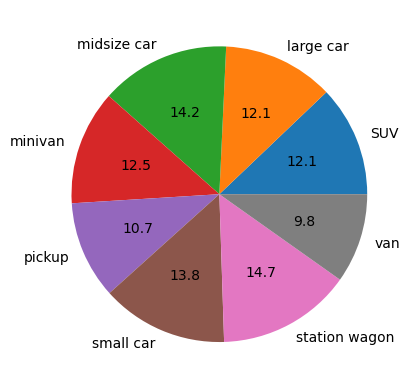

In [280]:
plt.pie(x=fueleco08['cmb_mpg'],labels=fueleco08.index,autopct='%0.1f');

In [281]:
fueleco18 = alpha18[['veh_class','cmb_mpg']]
fueleco18 = fueleco18.groupby('veh_class').mean()
fueleco18

,cmb_mpg
veh_class,
large car,23.409091
midsize car,27.884058
minivan,20.800000
pickup,18.589744
small SUV,24.074074
small car,25.421053
special purpose,18.500000
standard SUV,18.197674
station wagon,27.529412


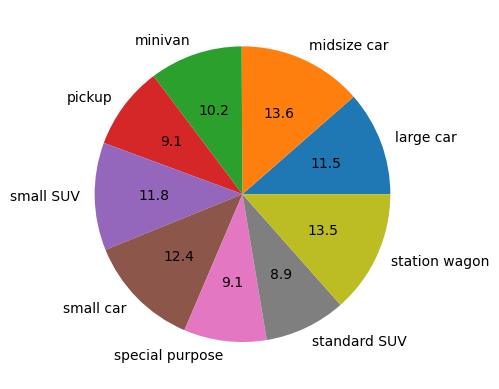

In [282]:
plt.pie(x=fueleco18['cmb_mpg'],labels=fueleco18.index,autopct='%0.1f');

Is there any change in characteristics of SmartWay Vehicles ?

In [283]:
alpha8.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [284]:
alpha18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


In [285]:
alpha18['smartway'].replace({'No':0, 'Yes':1,'Elite':2},inplace=True)
alpha18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,0
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,0
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,0
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,0
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,0


In [286]:
smartwaycars08 = alpha8[alpha8['smartway'] == 'yes']
smartwaycars08 = smartwaycars08[['model','displ','cyl','air_pollution_score','city_mpg','hwy_mpg','cmb_mpg','greenhouse_gas_score']]
smartwaycars08 = smartwaycars08.groupby('model').mean()
smartwaycars08.head(10)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
model,,,,,,,
ACURA TL,3.4,6.0,7.000000,17.666667,26.333333,20.666667,6.000000
ACURA TSX,2.4,4.0,6.000000,20.000000,28.000000,23.000000,7.000000
AUDI A3,2.0,4.0,7.000000,21.500000,29.000000,24.500000,7.000000
AUDI A4,2.0,4.0,7.000000,21.000000,30.000000,24.000000,7.000000
AUDI TT Coupe,2.0,4.0,7.000000,23.000000,31.000000,26.000000,8.000000
AUDI TT Roadster,2.0,4.0,7.000000,22.000000,29.000000,25.000000,7.000000
BMW 328ci,3.0,6.0,8.250000,21.500000,30.500000,24.500000,7.000000
BMW 328ci Convertible,3.0,6.0,8.250000,19.500000,29.500000,23.000000,6.500000
BMW 328cxi,3.0,6.0,7.833333,19.666667,27.333333,22.666667,6.666667


In [288]:
smartwaycars18 = alpha18[alpha18['smartway'] >0]
smartwaycars18 = smartwaycars18[['model','displ','cyl','air_pollution_score','city_mpg','hwy_mpg','cmb_mpg','greenhouse_gas_score']]
smartwaycars18 = smartwaycars18.groupby('model').mean()
smartwaycars18.head(10)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
model,,,,,,,
AUDI A4 Ultra,2.0,4.0,3.000000,27.000000,37.000000,31.000000,7.00
BMW 330e,2.0,4.0,3.000000,47.000000,56.000000,50.500000,10.00
BMW 530e,2.0,4.0,7.000000,47.500000,51.250000,49.000000,10.00
BMW 740e,2.0,4.0,3.000000,43.500000,48.500000,45.500000,9.00
BUICK Encore,1.4,4.0,3.000000,27.000000,33.000000,30.000000,7.00
CHEVROLET Cruze,1.5,4.0,4.500000,29.250000,44.750000,34.750000,7.25
CHEVROLET Cruze Hatchback,1.5,4.0,4.500000,28.750000,42.250000,33.250000,7.00
CHEVROLET Cruze Premier,1.4,4.0,6.000000,29.000000,39.000000,33.000000,8.00
CHEVROLET Cruze Premier Hatchback,1.4,4.0,6.000000,28.000000,37.000000,31.000000,7.00


Text(0.5, 0, 'Miles Per Gallon')

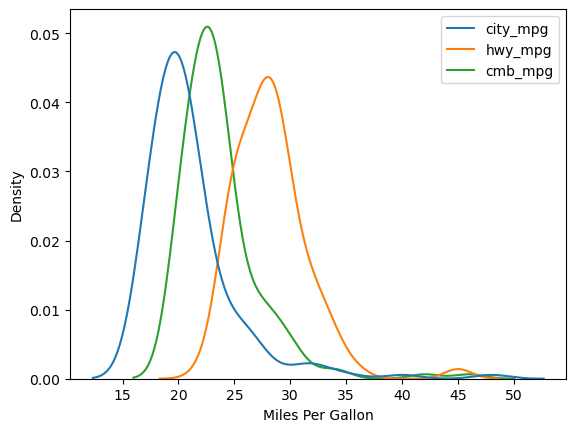

In [290]:
sns.kdeplot(data=smartwaycars08[['city_mpg','hwy_mpg','cmb_mpg']])
plt.xlabel('Miles Per Gallon')

Text(0.5, 0, 'Miles Per Gallon')

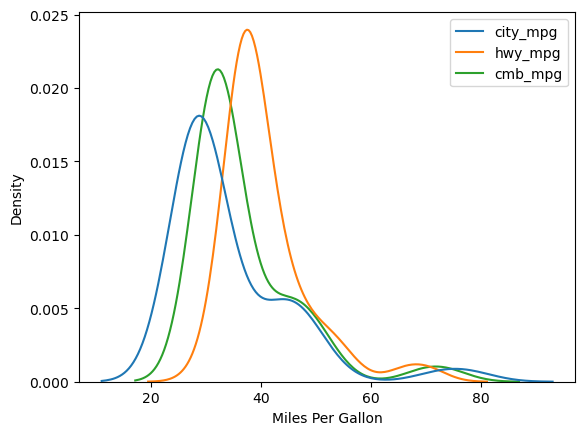

In [291]:
sns.kdeplot(data=smartwaycars18[['city_mpg','hwy_mpg','cmb_mpg']])
plt.xlabel('Miles Per Gallon')

Text(0.5, 0, 'greenhouse_gas_score')

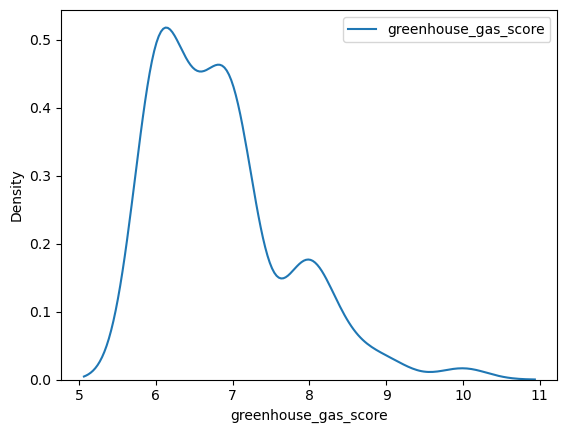

In [299]:
sns.kdeplot(data=smartwaycars08[['greenhouse_gas_score']])
plt.xlabel('greenhouse_gas_score')


Text(0.5, 0, 'greenhouse_gas_score')

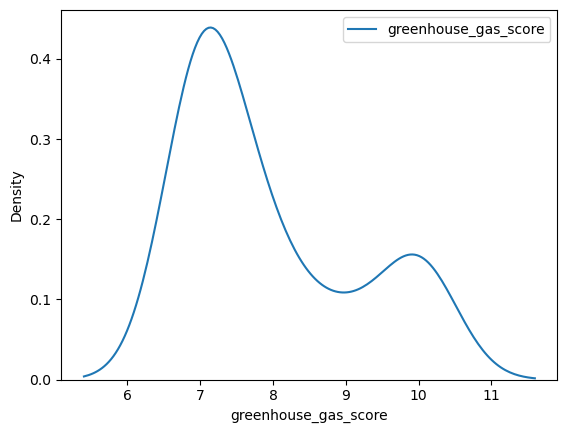

In [300]:
sns.kdeplot(data=smartwaycars18[['greenhouse_gas_score']])
plt.xlabel('greenhouse_gas_score')

In [305]:
year2008 = smartwaycars08.mean()
year2018 = smartwaycars18.mean()

<Axes: >

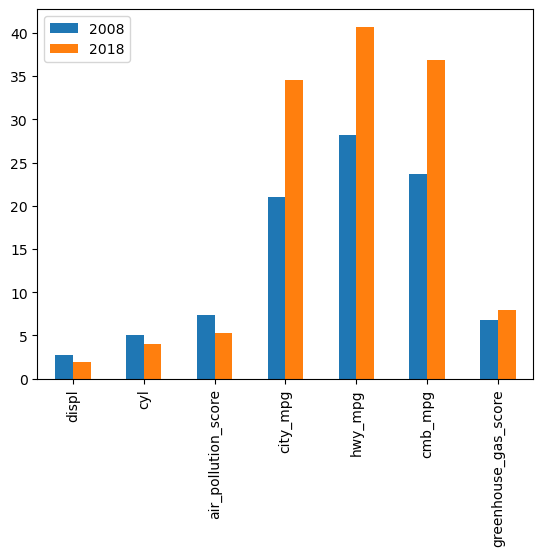

In [314]:
result = pd.DataFrame({'2008':year2008,'2018':year2018})
result.plot(kind='bar')

Q4. Which all features are associated with better fuel economy?


<Axes: >

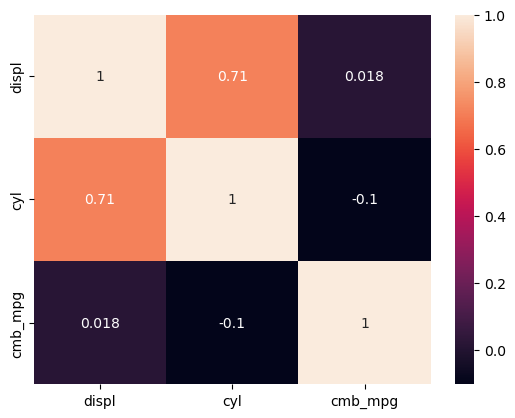

In [355]:
sns.heatmap(data=smartwaycars18[['displ','cyl','cmb_mpg']].corr(),annot=True)

<Axes: >

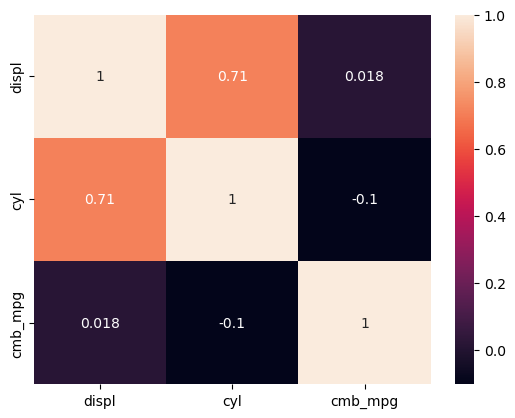

In [356]:
sns.heatmap(data=smartwaycars18[['displ','cyl','cmb_mpg']].corr(),annot=True)

Q5. How much improvement is there in miles/gallon or mpg? Also, which vehicle has improved the
most?

In [381]:
d2008 = alpha8.groupby('veh_class')['cmb_mpg'].mean()
d2008 

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [382]:
d2018 = alpha18.groupby('veh_class')['cmb_mpg'].mean()
d2018

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [383]:
Q5 = pd.DataFrame({"2008":d2008,"2018":d2018})
Q5

,2008,2018
veh_class,,
SUV,18.471429,NaN
large car,18.509091,23.409091
midsize car,21.601449,27.884058
minivan,19.117647,20.800000
pickup,16.277108,18.589744
small SUV,NaN,24.074074
small car,21.105105,25.421053
special purpose,NaN,18.500000
standard SUV,NaN,18.197674


<Axes: xlabel='veh_class'>

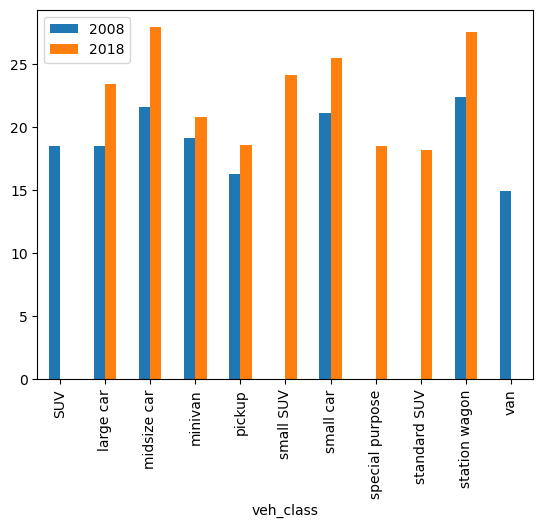

In [384]:
Q5.plot(kind='bar')